In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [216]:
import sys
print(sys.executable)


C:\Users\user\anaconda3\envs\tf_env\python.exe


In [217]:
history_df=pd.read_csv("TCS_stock_history.csv")
action_df=pd.read_csv("TCS_stock_action.csv")
history_df


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0
...,...,...,...,...,...,...,...,...
4458,2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,2320754,0.0,0.0
4459,2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,1673362,0.0,0.0
4460,2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,2253075,0.0,0.0
4461,2021-09-29,3759.800049,3806.000000,3722.149902,3791.899902,2489161,0.0,0.0


In [218]:
action_df

,Date,Dividends,Stock Splits
0,2004-10-28,0.3750,0.0
1,2005-02-03,0.4375,0.0
2,2005-07-06,0.6250,0.0
3,2005-08-18,0.3750,0.0
4,2005-10-18,0.3750,0.0
...,...,...,...
65,2020-07-16,5.0000,0.0
66,2020-10-14,12.0000,0.0
67,2021-01-14,6.0000,0.0
68,2021-05-25,15.0000,0.0


In [219]:
history_df['Stock Splits'].unique()

array([0., 2.])

In [220]:
history_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4463 non-null   object 
 1   Open          4463 non-null   float64
 2   High          4463 non-null   float64
 3   Low           4463 non-null   float64
 4   Close         4463 non-null   float64
 5   Volume        4463 non-null   int64  
 6   Dividends     4463 non-null   float64
 7   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 279.1+ KB


In [221]:
history_df['Date']=pd.to_datetime(history_df['Date'])
action_df['Date']=pd.to_datetime(action_df['Date'])


In [222]:
history_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          4463 non-null   datetime64[ns]
 1   Open          4463 non-null   float64       
 2   High          4463 non-null   float64       
 3   Low           4463 non-null   float64       
 4   Close         4463 non-null   float64       
 5   Volume        4463 non-null   int64         
 6   Dividends     4463 non-null   float64       
 7   Stock Splits  4463 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 279.1 KB


In [223]:
df=pd.merge(history_df,action_df,on='Date',how='left')
df

,Date,Open,High,Low,Close,Volume,Dividends_x,Stock Splits_x,Dividends_y,Stock Splits_y
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0,NaN,NaN
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0,NaN,NaN
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0,NaN,NaN
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0,NaN,NaN
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4458,2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,2320754,0.0,0.0,NaN,NaN
4459,2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,1673362,0.0,0.0,NaN,NaN
4460,2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,2253075,0.0,0.0,NaN,NaN
4461,2021-09-29,3759.800049,3806.000000,3722.149902,3791.899902,2489161,0.0,0.0,NaN,NaN


In [224]:
df['Dividends_y'].unique()

array([    nan,  0.375 ,  0.4375,  0.625 ,  0.5625,  0.75  ,  1.    ,
        1.25  ,  5.    ,  4.    ,  1.5   ,  6.5   ,  2.    , 10.    ,
       20.    ,  2.5   , 12.    ,  2.75  ,  5.5   , 13.5   ,  3.25  ,
       13.75  ,  3.5   , 14.5   , 18.    , 40.    ,  6.    , 15.    ,
        7.    ])

In [225]:
df['Stock Splits_y'].unique()

array([nan,  0.,  2.])

In [226]:
df['Dividends_y']=df['Dividends_y'].fillna(0)
df['Stock Splits_y']=df['Stock Splits_y'].fillna(0)

In [227]:
df.rename(columns={
    'Dividends_x':'Dividends',
    'Stock Splits_x':'Stock_Splits',
    'Dividends_y':'Action_Dividends',
    'Stock Splits_y':'Action_Splits'}, inplace=True)

In [228]:
df['Had_Event']=np.where((df['Action_Dividends']>0)|(df['Action_Splits']>0),1,0)

In [229]:
df['Close'].unique()

array([  29.51914024,   29.11947632,   27.11187744, ..., 3779.14990234,
       3791.89990234, 3773.19995117])

In [230]:
df.fillna(method='ffill',inplace=True)

In [231]:
df=df.sort_values('Date').reset_index(drop=True)

In [232]:
df['Close'].unique()

array([  29.51914024,   29.11947632,   27.11187744, ..., 3779.14990234,
       3791.89990234, 3773.19995117])

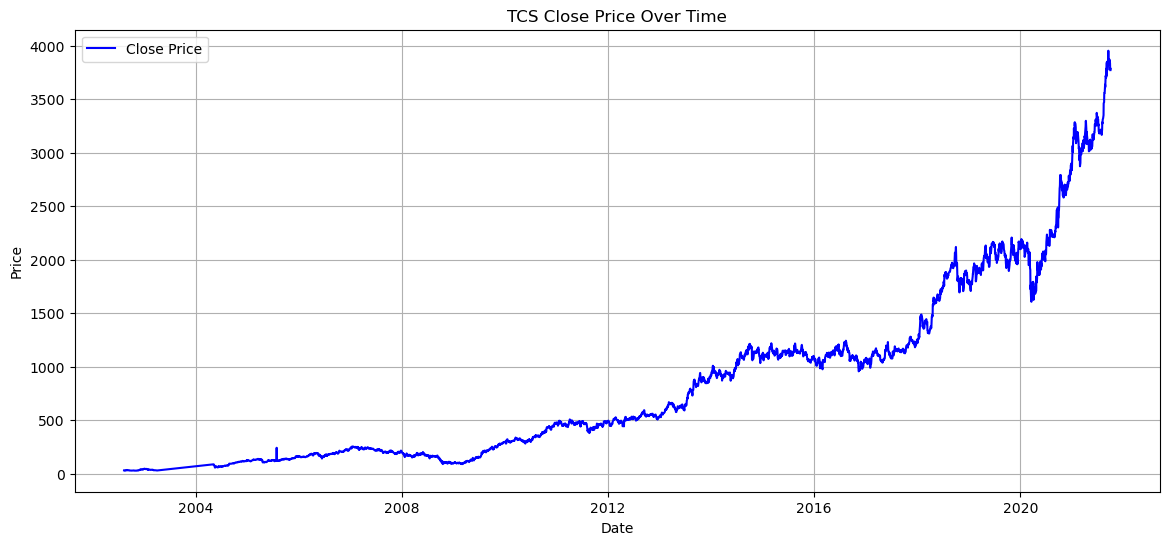

In [233]:
plt.figure(figsize=(14,6))
plt.plot(df['Date'],df['Close'],label='Close Price',color='blue')
plt.title("TCS Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.show()

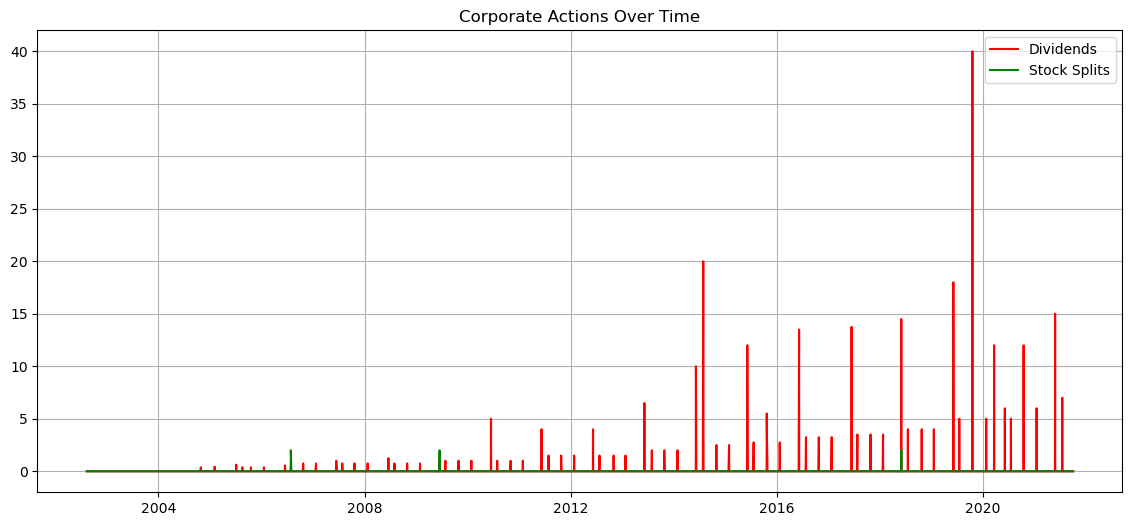

In [234]:
plt.figure(figsize=(14,6))
plt.plot(df['Date'],df['Action_Dividends'],label='Dividends',color='red')
plt.plot(df['Date'],df['Action_Splits'],label='Stock Splits',color='green')
plt.title("Corporate Actions Over Time")
plt.legend()
plt.grid(True)
plt.show()

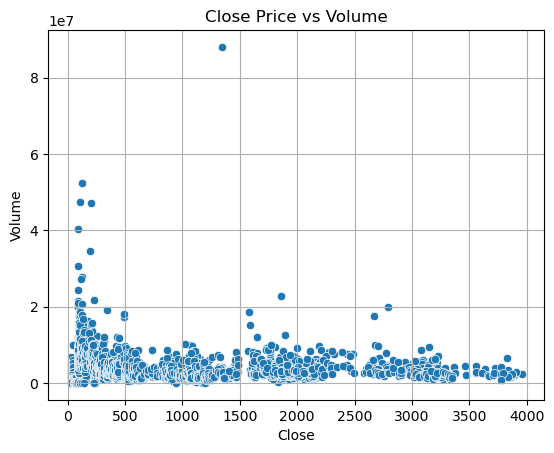

In [235]:
sns.scatterplot(x='Close',y='Volume',data=df)
plt.title("Close Price vs Volume")
plt.grid(True)
plt.show()

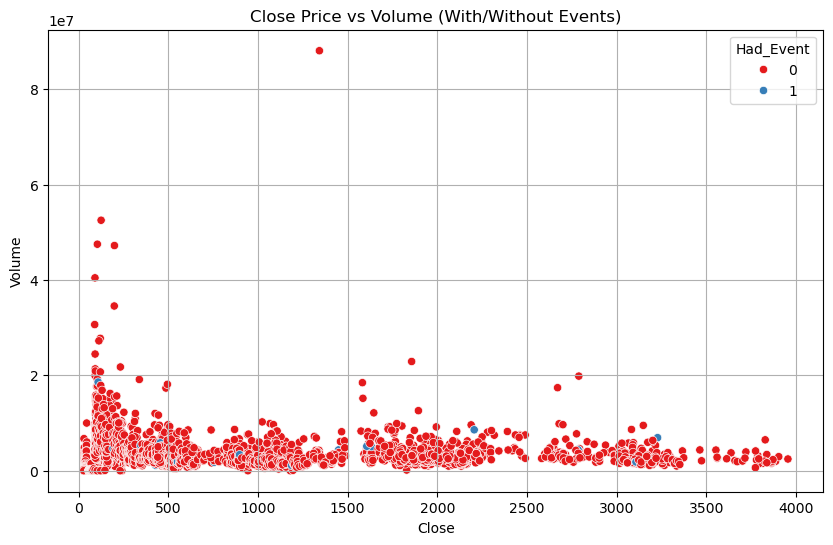

In [236]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Close',y='Volume',hue='Had_Event',data=df,palette='Set1')
plt.title("Close Price vs Volume (With/Without Events)")
plt.grid(True)
plt.show()

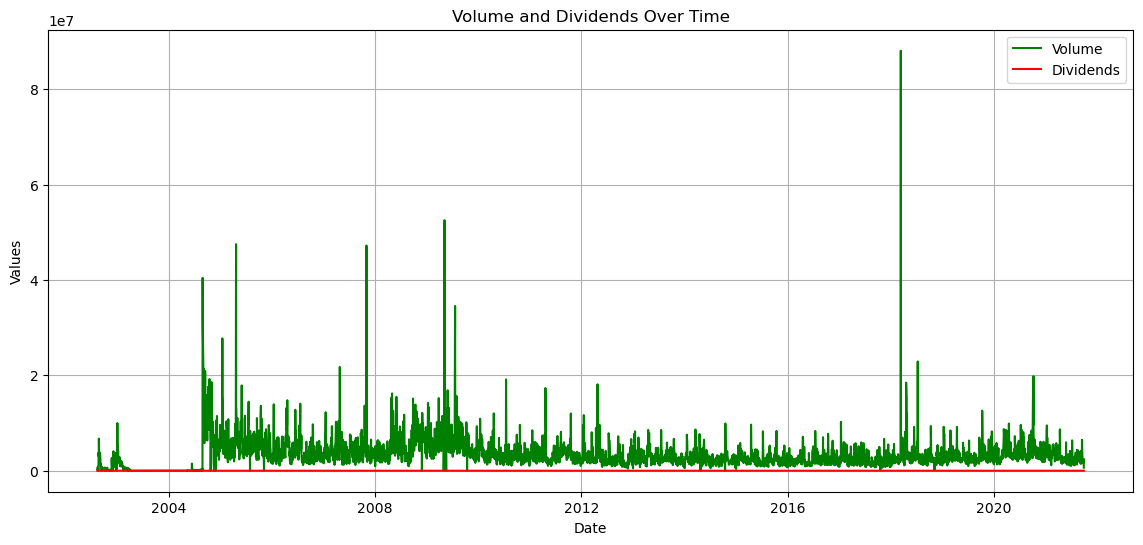

In [237]:
plt.figure(figsize=(14, 6))
plt.plot(df['Date'],df['Volume'],label='Volume',color='green')
plt.plot(df['Date'],df['Dividends'],label='Dividends',color='red')
plt.title("Volume and Dividends Over Time")
plt.xlabel("Date"); 
plt.ylabel("Values")
plt.legend(); 
plt.grid(True); 
plt.show()

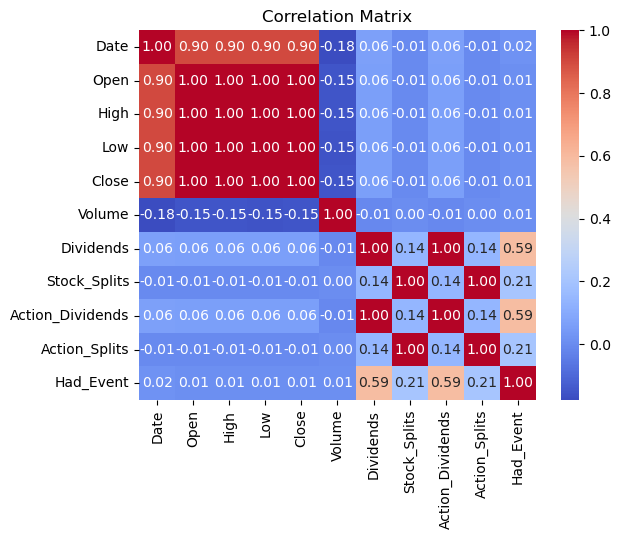

In [238]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [239]:
df['MA_30']=df['Close'].rolling(window=30).mean()
df['MA_100']=df['Close'].rolling(window=100).mean()
df['MA_7'] = df['Close'].rolling(7).mean()
df['MA_14'] = df['Close'].rolling(14).mean()
df['Rolling_STD_7'] = df['Close'].rolling(7).std()
df['Lag_3'] = df['Close'].shift(3)
df.dropna(inplace=True)

In [240]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
df['DayOfWeek']=df['Date'].dt.dayofweek
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock_Splits,Action_Dividends,Action_Splits,...,MA_30,MA_100,MA_7,MA_14,Rolling_STD_7,Lag_3,Year,Month,Day,DayOfWeek
99,2002-12-27,41.378838,41.546137,39.993965,40.161266,956984,0.0,0.0,0.0,0.0,...,35.633324,30.845170,39.827990,38.778383,0.814320,39.956783,2002,12,27,4
100,2002-12-30,40.151972,42.921713,39.231823,42.494171,4253744,0.0,0.0,0.0,0.0,...,36.100214,30.974921,40.260847,39.178707,1.267761,39.956783,2002,12,30,0
101,2002-12-31,42.773013,45.421928,41.639090,44.696960,9998480,0.0,0.0,0.0,0.0,...,36.640531,31.130695,40.961915,39.612227,2.068000,41.090710,2002,12,31,1
102,2003-01-01,44.603994,46.081808,44.603994,45.421906,6027072,0.0,0.0,0.0,0.0,...,37.173722,31.313796,41.968369,40.074957,2.301357,40.161266,2003,1,1,2
103,2003-01-02,45.747217,46.788192,43.061123,43.349251,5325328,0.0,0.0,0.0,0.0,...,37.552935,31.476169,42.453007,40.378354,2.160004,42.494171,2003,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4458,2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,2320754,0.0,0.0,0.0,0.0,...,3736.128320,3363.353130,3860.042864,3852.824986,27.286521,3862.949951,2021,9,24,4
4459,2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,1673362,0.0,0.0,0.0,0.0,...,3752.301652,3371.439673,3850.564279,3851.749983,20.414533,3862.149902,2021,9,27,0
4460,2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,2253075,0.0,0.0,0.0,0.0,...,3762.826652,3378.491946,3843.607108,3849.124983,33.530540,3869.250000,2021,9,28,1
4461,2021-09-29,3759.800049,3806.000000,3722.149902,3791.899902,2489161,0.0,0.0,0.0,0.0,...,3773.458317,3385.515327,3839.092808,3850.392840,38.454453,3871.300049,2021,9,29,2


In [241]:
df['Prev_Close']=df['Close'].shift(1)
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)


In [242]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock_Splits,Action_Dividends,Action_Splits,...,MA_100,MA_7,MA_14,Rolling_STD_7,Lag_3,Year,Month,Day,DayOfWeek,Prev_Close
0,2002-12-30,40.151972,42.921713,39.231823,42.494171,4253744,0.0,0.0,0.0,0.0,...,30.974921,40.260847,39.178707,1.267761,39.956783,2002,12,30,0,40.161266
1,2002-12-31,42.773013,45.421928,41.639090,44.696960,9998480,0.0,0.0,0.0,0.0,...,31.130695,40.961915,39.612227,2.068000,41.090710,2002,12,31,1,42.494171
2,2003-01-01,44.603994,46.081808,44.603994,45.421906,6027072,0.0,0.0,0.0,0.0,...,31.313796,41.968369,40.074957,2.301357,40.161266,2003,1,1,2,44.696960
3,2003-01-02,45.747217,46.788192,43.061123,43.349251,5325328,0.0,0.0,0.0,0.0,...,31.476169,42.453007,40.378354,2.160004,42.494171,2003,1,2,3,45.421906
4,2003-01-03,44.613315,45.394048,43.497982,43.879055,4198040,0.0,0.0,0.0,0.0,...,31.644492,43.013331,40.839758,1.897298,44.696960,2003,1,3,4,43.349251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4358,2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,2320754,0.0,0.0,0.0,0.0,...,3363.353130,3860.042864,3852.824986,27.286521,3862.949951,2021,9,24,4,3869.250000
4359,2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,1673362,0.0,0.0,0.0,0.0,...,3371.439673,3850.564279,3851.749983,20.414533,3862.149902,2021,9,27,0,3871.300049
4360,2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,2253075,0.0,0.0,0.0,0.0,...,3378.491946,3843.607108,3849.124983,33.530540,3869.250000,2021,9,28,1,3836.949951
4361,2021-09-29,3759.800049,3806.000000,3722.149902,3791.899902,2489161,0.0,0.0,0.0,0.0,...,3385.515327,3839.092808,3850.392840,38.454453,3871.300049,2021,9,29,2,3779.149902


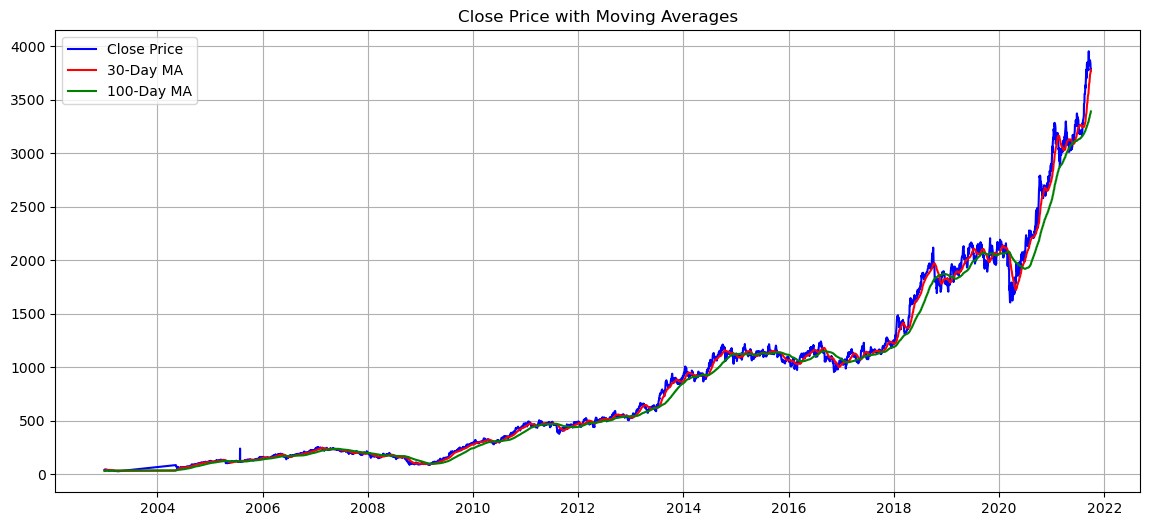

In [243]:
plt.figure(figsize=(14, 6))
plt.plot(df['Date'],df['Close'],label='Close Price',color='blue')
plt.plot(df['Date'],df['MA_30'],label='30-Day MA',color='red')
plt.plot(df['Date'],df['MA_100'],label='100-Day MA',color='green')
plt.title("Close Price with Moving Averages")
plt.legend();
plt.grid(True);
plt.show()

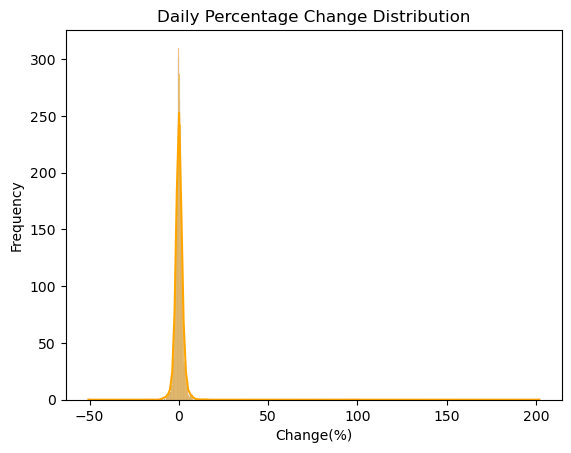

In [244]:
df['Daily_Change']=df['Close'].pct_change() * 100
sns.histplot(df['Daily_Change'].dropna(),kde=True,color='orange')
plt.title("Daily Percentage Change Distribution")
plt.xlabel("Change(%)")
plt.ylabel("Frequency")
plt.show()

In [245]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [246]:
df['Target']=df['Close'].shift(-1)
df.dropna(inplace=True)
features=['Prev_Close', 'Volume', 'Had_Event', 'MA_7', 'MA_14','Rolling_STD_7', 'Lag_3', 'Daily_Change', 'DayOfWeek', 'Month']
X=df[features]
y=df['Target']


In [247]:
X=X.reset_index(drop=True)
y=y.reset_index(drop=True)
split_index=int(len(X) * 0.8)
x_train=X[:split_index]
x_test=X[split_index:]
y_train=y[:split_index]
y_test=y[split_index:]




In [248]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [249]:
print("x_train:", x_train_scaled.shape)
print("x_test:", x_test_scaled.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

x_train: (3488, 10)
x_test: (873, 10)
y_train: (3488,)
y_test: (873,)


In [250]:
model_lr=LinearRegression()
model_lr.fit(x_train, y_train)
y_pred_lr=model_lr.predict(x_test)

print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))


Linear Regression MSE: 2480.566965286716
Linear Regression R²: 0.9928279830471329


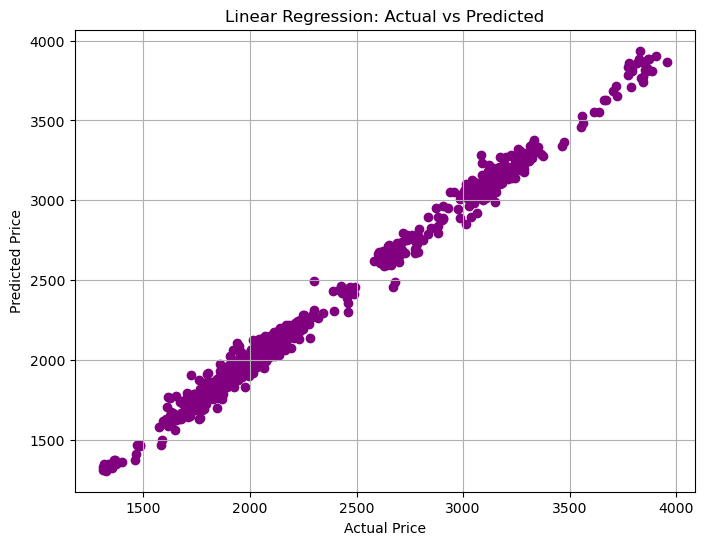

In [251]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='purple')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()


In [252]:
scaler=MinMaxScaler()
scaled_close=scaler.fit_transform(df['Close'].values.reshape(-1,1))

X_lstm, y_lstm = [], []
for i in range(60, len(scaled_close)):
    X_lstm.append(scaled_close[i-60:i])
    y_lstm.append(scaled_close[i])


In [253]:
X_lstm, y_lstm=np.array(X_lstm), np.array(y_lstm)

# Train-test split
split=int(0.8*len(X_lstm))
X_train_lstm, X_test_lstm = X_lstm[:split], X_lstm[split:]
y_train_lstm,y_test_lstm = y_lstm[:split], y_lstm[split:]

In [254]:
model_lstm=Sequential()
model_lstm.add(LSTM(units=50, return_sequences=False, input_shape=(X_train_lstm.shape[1], 1)))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

In [255]:
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=30, batch_size=32)


Epoch 1/30
108/108 [==============================] - 9s 31ms/step - loss: 7.5145e-04
Epoch 2/30
108/108 [==============================] - 4s 37ms/step - loss: 3.0929e-05
Epoch 3/30
108/108 [==============================] - 18s 168ms/step - loss: 3.0204e-05
Epoch 4/30
108/108 [==============================] - 27s 249ms/step - loss: 2.7023e-05
Epoch 5/30
108/108 [==============================] - 14s 129ms/step - loss: 2.6536e-05
Epoch 6/30
108/108 [==============================] - 21s 193ms/step - loss: 2.5974e-05
Epoch 7/30
108/108 [==============================] - 15s 140ms/step - loss: 2.7104e-05
Epoch 8/30
108/108 [==============================] - 22s 202ms/step - loss: 2.6347e-05
Epoch 9/30
108/108 [==============================] - 22s 201ms/step - loss: 2.4510e-05
Epoch 10/30
108/108 [==============================] - 17s 161ms/step - loss: 2.4214e-05
Epoch 11/30
108/108 [==============================] - 38s 349ms/step - loss: 2.3050e-05
Epoch 12/30
108/108 [=============

In [256]:
predicted = model_lstm.predict(X_test_lstm)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test_lstm.reshape(-1, 1))
mae = mean_absolute_error(real_prices, predicted_prices)
print("LSTM MAE:", mae)

27/27 [==============================] - 3s 25ms/step
LSTM MAE: 39.15884013070739


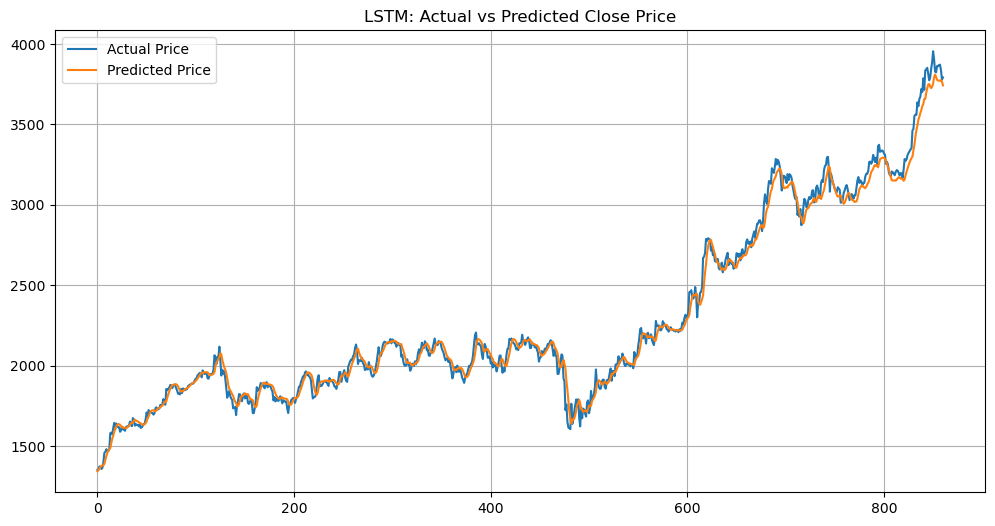

In [257]:
plt.figure(figsize=(12, 6))
plt.plot(real_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title("LSTM: Actual vs Predicted Close Price")
plt.legend()
plt.grid(True)
plt.show()